Given the following confusion matrix, evaluate (by hand) the model's performance.


|               | pred dog   | pred cat   |
|:------------  |-----------:|-----------:|
| actual dog    |         46 |         7  |
| actual cat    |         13 |         34 |


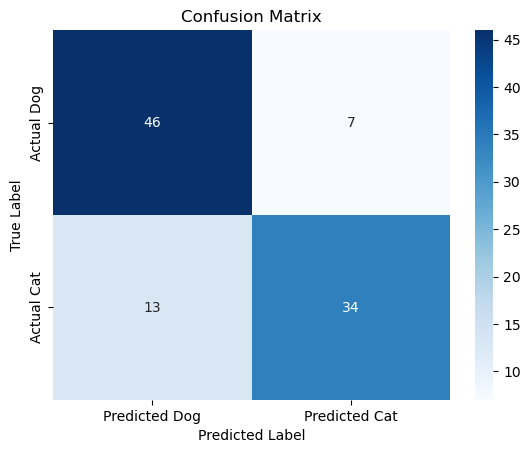

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create the confusion matrix
confusion = np.array([[46, 7], [13, 34]])

# Convert the confusion matrix to a pandas dataframe
confusion_df = pd.DataFrame(confusion, index=['Actual Dog', 'Actual Cat'], columns=['Predicted Dog', 'Predicted Cat'])

# Plot the confusion matrix as a heatmap using seaborn
sns.heatmap(confusion_df, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [2]:
confusion

array([[46,  7],
       [13, 34]])

> What is a false positive? False positives are cases where the model predicted a positive class (in this case, cat) when the actual class was negative (dog).

> The model predicted 7 cases as cat when the actual class was dog. Therefore, the number of false positives is 7.

> What is a false negative? False negatives are cases where the model predicted a negative class (in this case, dog) when the actual class was positive (cat).

> The model predicted 13 cases as dog when the actual class was cat. Therefore, the number of false negatives is 13

> How would you describe this model? See the code block below for a description of each evaluation.

In [16]:
# Calculate the accuracy
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.8


> The accuracy of the model is (46+34)/(46+7+13+34) = 80%, 
> which indicates that the model correctly classified 80% of the instances.
> The model accuracy is approximately 0.80 or 80%, which indicates that the model performs significantly better than the baseline.

In [21]:
baseline_accuracy = 46 / (46 + 47)
# Define the number of instances in the most frequent class
n_dogs = 46

# Define the total number of instances
n_total = 46 + 7 + 13 + 34

# Calculate the baseline accuracy
baseline_accuracy = n_dogs / n_total

# Print the baseline accuracy
print("Baseline Accuracy:", baseline_accuracy)

Baseline Accuracy: 0.46


> Baseline accuracy, calculated as the proportion of the most frequent class
> in the dataset. The most frequent class is dogs, with 46 instances in the actual data.
> The baseline accuracy is approximately 46%, which represents the accuracy that can be achieved by a simple classifier that always predicts the most frequent class in the dataset (in this case, dogs).

In [24]:
# Calculate the recall
TP = confusion[1][1]
FN = confusion[1][0]
recall = TP / (TP + FN)
recall = round(sensitivity, 2)
# Print the sensitivity
print("Recall:", recall)

Recall: 0.72


> The recall (senstivity) of the model is (34)/(13+34) = 72%, 
> which indicates that the model correctly identified 72% of the instances 
> that actually belonged to the cat class.

In [23]:
baseline_recall = 0 / 13

# Define the number of instances in the most frequent class
n_dogs = 46

# Define the number of positive instances in the dataset that belong to the most frequent class
n_positive_dogs = 0

# Define the number of positive instances in the dataset that belong to the other class
n_positive_cats = 13

# Calculate the baseline recall
baseline_recall = n_positive_dogs / (n_positive_dogs + n_positive_cats)

# Print the baseline recall
print("Baseline Recall:", baseline_recall)

Baseline Recall: 0.0


> The baseline recall is 0, since the baseline classifier always predicts
> the most frequent class (dogs) and does not identify any instances 
> of the other class. (cats) as positive.

In [20]:
# Calculate the precision
TP = confusion[1][1]
FN = confusion[1][0]
precision = TP / (TP + FP)
precision = round(precision, 2)
# Print the precision
print("Precision:", precision)

Precision: 0.83


> The precision of the model is (34)/(7+34) = 83%, which indicates 
> that when the model predicted cat, it was correct 83% of the time.

In [26]:
baseline_precision = 46 / (46 + 7)
# Define the number of instances predicted as positive by the baseline classifier
n_predicted_dogs = 46 + 7

# Define the number of instances predicted as positive by the baseline classifier that actually belong to the most frequent class
n_true_dogs = 46

# Calculate the baseline precision
baseline_precision = n_true_dogs / n_predicted_dogs

# Print the baseline precision
print("Baseline Precision:", baseline_precision)

Baseline Precision: 0.8679245283018868


> The baseline precision is approximately 87%, which represents the precision 
> that can be achieved by a simple classifier that always predicts the most 
> frequent class in the dataset (in this case, dogs)

In [19]:
# Calculate the false positive rate (FPR)
FP = confusion[0][1]
TN = confusion[0][0]
FPR = FP / (FP + TN)
FPR = round(FPR, 2)

# Calculate the false negative rate (FNR)
FN = confusion[1][0]
TP = confusion[1][1]
FNR = FN / (FN + TP)
FNR = round(FNR, 2)

# Print the FPR and FNR
print("False Positive Rate (FPR):", FPR)
print("False Negative Rate (FNR):", FNR)

False Positive Rate (FPR): 0.13
False Negative Rate (FNR): 0.28


> The false positive rate (FPR) of the model is (7)/(46+7) = 13%, 
> which indicates that the model falsely predicted cat 13% of the time 
> when the actual class was dog.

> Wrap-up: How would you describe this model?


> Overall, this model seems to perform reasonably well, with a relatively high accuracy 
> and precision. However, the FNR of 28% indicates that the model may miss a significant 
> number of cat instances,

In [29]:
from sklearn.metrics import confusion_matrix

In [37]:
import pandas as pd

# Import the dataset
data = pd.read_csv('c3.csv')
print(data)

        actual     model1     model2     model3
0    No Defect  No Defect     Defect  No Defect
1    No Defect  No Defect     Defect     Defect
2    No Defect  No Defect     Defect  No Defect
3    No Defect     Defect     Defect     Defect
4    No Defect  No Defect     Defect  No Defect
..         ...        ...        ...        ...
195  No Defect  No Defect     Defect     Defect
196     Defect     Defect  No Defect  No Defect
197  No Defect  No Defect  No Defect  No Defect
198  No Defect  No Defect     Defect     Defect
199  No Defect  No Defect  No Defect     Defect

[200 rows x 4 columns]


In [39]:
# separate the actual labels from the predicted labels for each model
actual = data['actual']
model1 = data['model1']
model2 = data['model2']
model3 = data['model3']

In [41]:
# calculate sensitivity and recall for each model
sensitivity1, recall1 = calculate_sensitivity_recall(actual, model1)
sensitivity2, recall2 = calculate_sensitivity_recall(actual, model2)
sensitivity3, recall3 = calculate_sensitivity_recall(actual, model3)

In [42]:
# Print the Sensitity/Recall for each Model
print('Model 1 sensitivity:', sensitivity1)
print('Model 1 recall:', recall1)
print('Model 2 sensitivity:', sensitivity2)
print('Model 2 recall:', recall2)
print('Model 3 sensitivity:', sensitivity3)
print('Model 3 recall:', recall3)

Model 1 sensitivity: 0.9891304347826086
Model 1 recall: 0.9578947368421052
Model 2 sensitivity: 0.5597826086956522
Model 2 recall: 0.9363636363636364
Model 3 sensitivity: 0.532608695652174
Model 3 recall: 0.9702970297029703


> Sensitivity and recall are important metrics to evaluate the performance of a binary 
> classification model in identifying positive instances of a target variable. 
> Sensitivity is concerned only with the true positives and false negatives, 
> while recall also takes into account false positives.

In [44]:
# Define a function to calculate precision
def precision(tp, fp):
    return tp / (tp + fp)

In [45]:
# Calculate precision for each model
tp_model1 = len(data[(data["actual"] == "Defect") & (data["model1"] == "Defect")])
fp_model1 = len(data[(data["actual"] == "No Defect") & (data["model1"] == "Defect")])
precision_model1 = precision(tp_model1, fp_model1)

tp_model2 = len(data[(data["actual"] == "Defect") & (data["model2"] == "Defect")])
fp_model2 = len(data[(data["actual"] == "No Defect") & (data["model2"] == "Defect")])
precision_model2 = precision(tp_model2, fp_model2)

tp_model3 = len(data[(data["actual"] == "Defect") & (data["model3"] == "Defect")])
fp_model3 = len(data[(data["actual"] == "No Defect") & (data["model3"] == "Defect")])
precision_model3 = precision(tp_model3, fp_model3)

In [46]:
# Print precision for each model
print("Precision for Model 1: {:.2f}".format(precision_model1))
print("Precision for Model 2: {:.2f}".format(precision_model2))
print("Precision for Model 3: {:.2f}".format(precision_model3))

Precision for Model 1: 0.80
Precision for Model 2: 0.10
Precision for Model 3: 0.13


In [48]:
import pandas as pd

# Import the dataset
data = pd.read_csv('gives_you_paws.csv')
print(data)

     actual model1 model2 model3 model4
0       cat    cat    dog    cat    dog
1       dog    dog    cat    cat    dog
2       dog    cat    cat    cat    dog
3       dog    dog    dog    cat    dog
4       cat    cat    cat    dog    dog
...     ...    ...    ...    ...    ...
4995    dog    dog    dog    dog    dog
4996    dog    dog    cat    cat    dog
4997    dog    cat    cat    dog    dog
4998    cat    cat    cat    cat    dog
4999    dog    dog    dog    dog    dog

[5000 rows x 5 columns]


In [49]:
# Extract the actual labels and predicted labels from the DataFrame
actual_labels = data.index
predicted_labels = data.columns.values

# Create the confusion matrix
conf_matrix = data.values

# Print the confusion matrix
print(conf_matrix)

[['cat' 'cat' 'dog' 'cat' 'dog']
 ['dog' 'dog' 'cat' 'cat' 'dog']
 ['dog' 'cat' 'cat' 'cat' 'dog']
 ...
 ['dog' 'cat' 'cat' 'dog' 'dog']
 ['cat' 'cat' 'cat' 'cat' 'dog']
 ['dog' 'dog' 'dog' 'dog' 'dog']]


In [57]:
conf_matrix

array([[1423,  323],
       [ 640, 2614]])

In [59]:
# Define a dictionary to map string labels to numerical labels
label_map = {'cat': 0, 'dog': 1}

# Convert the actual and predicted labels to numerical labels
actual_labels = data['actual'].map(label_map)
predicted_labels = data['model1'].map(label_map)

# Create the confusion matrix
conf_matrix1 = confusion_matrix(actual_labels, predicted_labels)

# Print the confusion matrix
print(conf_matrix1)

[[1423  323]
 [ 640 2614]]


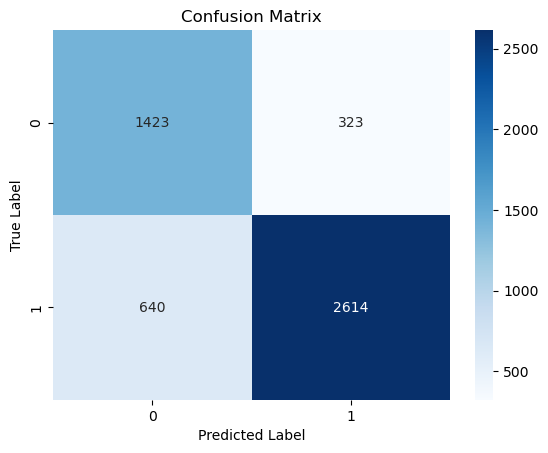

In [60]:
# Plot the confusion matrix as a heatmap using seaborn
sns.heatmap(conf_matrix1, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [55]:
# Convert the actual and predicted labels to numerical labels
actual_labels = data['actual'].map(label_map)
predicted_labels = data['model2'].map(label_map)

# Create the confusion matrix
conf_matrix2 = confusion_matrix(actual_labels, predicted_labels)

# Print the confusion matrix
print(conf_matrix2)

[[1555  191]
 [1657 1597]]


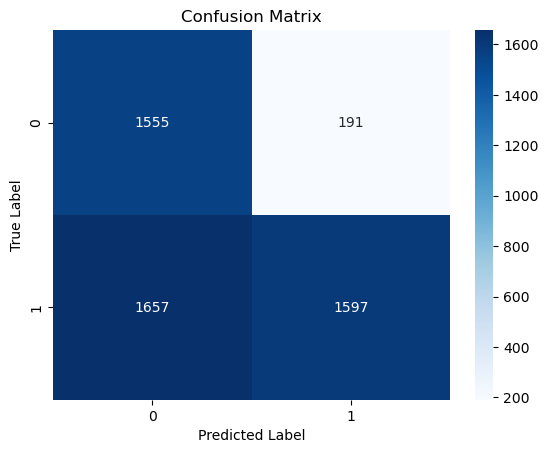

In [56]:
# Plot the confusion matrix as a heatmap using seaborn
sns.heatmap(conf_matrix2, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [61]:
# Convert the actual and predicted labels to numerical labels
actual_labels = data['actual'].map(label_map)
predicted_labels = data['model3'].map(label_map)

# Create the confusion matrix
conf_matrix3 = confusion_matrix(actual_labels, predicted_labels)

# Print the confusion matrix
print(conf_matrix3)

[[ 893  853]
 [1599 1655]]


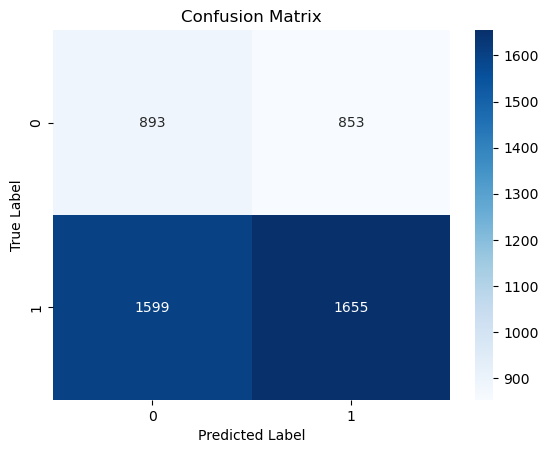

In [62]:
# Plot the confusion matrix as a heatmap using seaborn
sns.heatmap(conf_matrix3, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [64]:
# Convert the actual and predicted labels to numerical labels
actual_labels = data['actual'].map(label_map)
predicted_labels = data['model3'].map(label_map)

# Create the confusion matrix
conf_matrix4 = confusion_matrix(actual_labels, predicted_labels)

# Print the confusion matrix
print(conf_matrix4)

[[ 893  853]
 [1599 1655]]


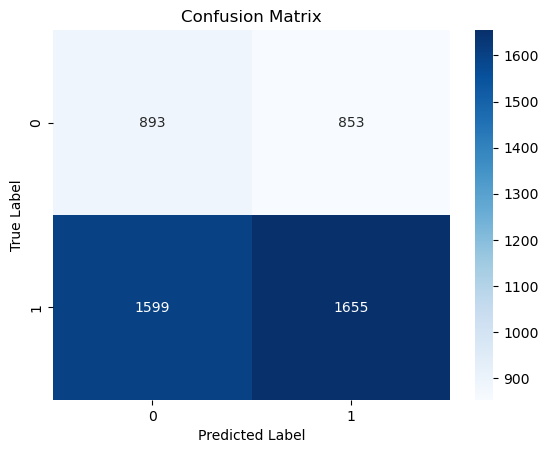

In [65]:
# Plot the confusion matrix as a heatmap using seaborn
sns.heatmap(conf_matrix4, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()